## Step 1 : Import Libraries and Load Data

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
#Load Historical stock price data 
df = pd.read_csv('AAPL.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [5]:
df.shape

(184, 7)

## Step 2: Data Preprocessing

In [7]:
#Extraction the 'Close' column for predicton
data = df.filter(['Close'])

#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model on (80%)
training_data_len = int(np.ceil(len(dataset) * .8 ))

#spllit the data into training and testing sts using train_test_split
X=[]
y=[]
for i in range(60,len(dataset)):
    X.append(dataset[i-60:i,0])
    y.append(dataset[i,0])



X= np.array(X)
y = np.array(y)

#split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,shuffle = False)

#Print the shpaes for debugging
print(f'X_train shape:{X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape:{X_test.shape}, y_test shape: {y_test.shape}')


X_train shape:(99, 60), y_train shape: (99,)
X_test shape:(25, 60), y_test shape: (25,)


## Step 3: Build and Train the Linear Grgression Model

In [8]:
#Initialize the linear regression model
model = LinearRegression()

#Train the model
model.fit(X_train,y_train)

#Get the model's predictions
predictions = model.predict(X_test)

# Evaluate the model (optional, but useful for understanding performance)
mse = mean_squared_error(y_test,predictions)
rmse=np.sqrt(mse)
print(f'Root mean Squared Error (RMSE):{rmse}')


Root mean Squared Error (RMSE):9.105530789926139


## Step 4: Visualize the Results

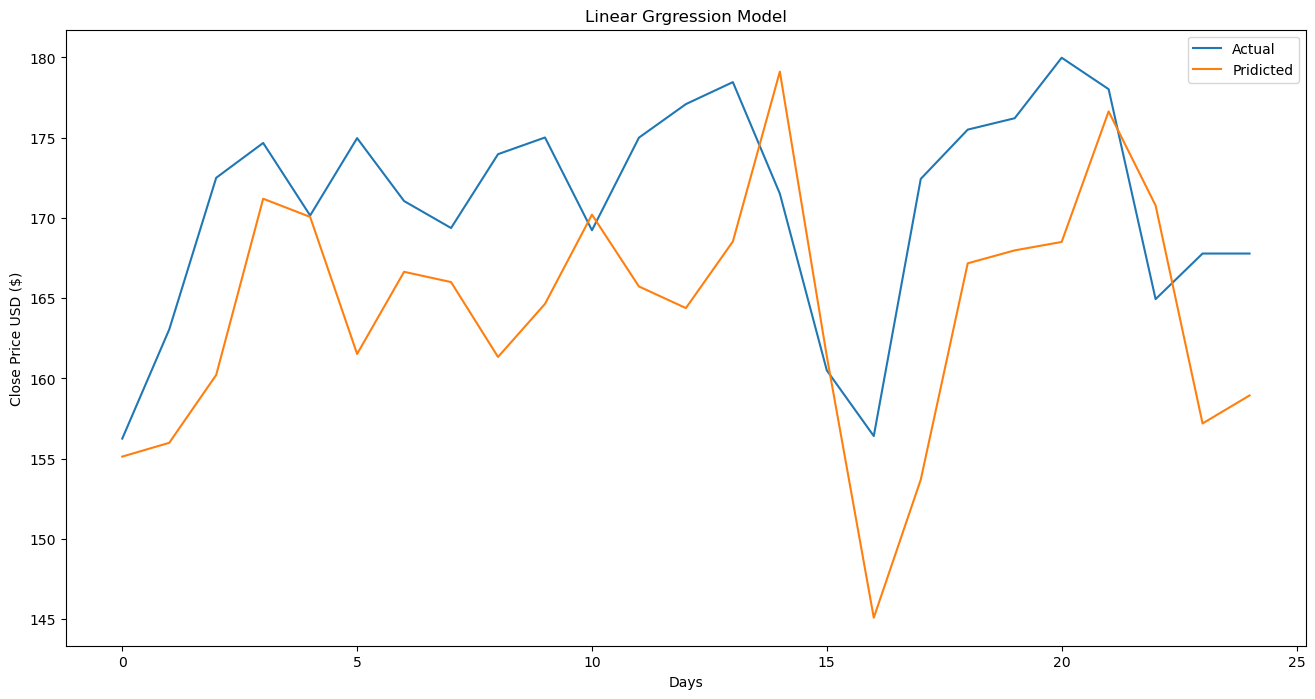

In [9]:
#plot the data 
plt.figure(figsize=(16,8))
plt.title("Linear Grgression Model")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(y_test,label='Actual')
plt.plot(predictions,label='Pridicted')
plt.legend()
plt.show()

## Predicting the next day's share price

In [10]:
#Predict the next day's closing Price
last_60_days = data[-60:].values #last 60 days of closing prices
predicted_price = model.predict(last_60_days.reshape(1,-1)) #Predict next day's price

print(f"Predictd price for the next day:{predicted_price[0]}")

Predictd price for the next day:163.4936723374509
